<a href="https://colab.research.google.com/github/urmzd/md-nlp/blob/main/src/fast-text-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyppeteer
!pip install ipython ipykernel --upgrade

In [2]:
!apt-get update 
!apt-get install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!dpkg -L chromium-chromedriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,461 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 

In [3]:
import random
from numpy import random as nprd
import tensorflow as tf
tf.random.set_seed(42)
random.seed(42)
nprd.seed(42)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
import asyncio
import re
import csv
import pyppeteer as ptr
import pandas as pd
!pip install nltk -U
import nltk
from typing import Optional, TypeVar
from typing import Callable
from glob import glob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 749 kB 66.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [7]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip show gensim
!pip install -U gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.7/dist-packages
Requires: smart-open, scipy, six, numpy
Required-by: 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [10]:
resource_path = "/content/drive/MyDrive/resources/"

data_path = resource_path + "data/"
data_source_path = data_path + "sources/"
data_target_path = data_path + "targets/"

corpus_name = "corpus"

In [11]:
global_config = {
    "word_limit": 56,
    "test_size": 0.3
}

In [12]:
from typing import Tuple
def get_name_and_extension(file_path: str) -> Tuple[str, str]:
    regex = re.compile(r"(.*)/(.*)\.(.*)")
    return regex.match(file_path).group(2,3)

In [13]:
!curl -sSL https://dl.google.com/linux/linux_signing_key.pub | apt-key add -
!echo "deb [arch=amd64] https://dl.google.com/linux/chrome/deb/ stable main" > /etc/apt/sources.list.d/google-chrome.list
!apt update -y && apt install -y google-chrome-stable

OK
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Get:2 https://dl.google.com/linux/chrome/deb stable InRelease [1,811 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,088 B]
Hit:13 http://archive.ubuntu.com/ubuntu bionic

In [14]:
# scraper.py
from pyppeteer import launch, browser
from typing import Union, List, Callable, Tuple, TypeVar
from nltk import tokenize,data
from glob import glob
import csv
import re
import pickle

# Declare Types.
Url = str
Selector = str
Html = str

ProcessedText = List[str]
Processor = TypeVar('Processor', Callable[[Html], ProcessedText], None)

def tokenize_by_sentence(html: str) -> ProcessedText:
  sent_detector = data.load('tokenizers/punkt/english.pickle')
  return sent_detector.tokenize(html)

def replace_all_new_lines(texts: ProcessedText) -> ProcessedText:
  return [re.sub('\n', ' ', text) for text in texts]

def pipeline(*transformers):
  fns = [*transformers]
  def pipeline_inner(input, fns=transformers):
    head, *tail = fns
    new_input = head(input)
    if tail:
      return pipeline_inner(new_input, tail)

    return new_input
  
  return pipeline_inner

def write_to_resource_target(target_path: str, file_name: str, content: ProcessedText, extension=".txt", mode="a") -> None:
    with open(f"{target_path}{file_name}{extension}", mode) as file:
        file.write("\n".join(content))

# Core
async def scraper() -> Tuple[Callable[[Url, Selector, Processor], ProcessedText], browser.Browser]:
  browser = await launch(
        headless=True,
        executablePath="/usr/bin/chromium-browser", 
        args= ['--no-sandbox']
  )

  async def inner_download_html(url: Url, selector: Selector, processor: Processor = None) -> ProcessedText:
    page = await browser.newPage()
    await page.goto(url, waitUntil="load", timeout=0)
    content = await page.querySelector(selector)

    html = ''
    if content:
        html = await page.evaluate('(element) => element.textContent', content)
    
    if processor:
      processed = processor(html)
      print(len(html), len(processed))
      return processed


    return [html]
  
  return (inner_download_html, browser)

async def get_training_data_from_folder(source_path: str, target_path: str, force=False) -> None:
    glob_pattern = "/**/*"
    source_files = glob(source_path + glob_pattern, recursive=True)
    target_files = glob(target_path + glob_pattern, recursive=True)
    target_file_names = [get_name_and_extension(file_path)[0] for file_path in target_files]
    
    download_html, browser = await scraper() 

    for file_path in source_files:
        [file_name, file_extension] = get_name_and_extension(file_path)

        if not file_name in target_file_names or force:
            with open(file_path, 'r') as file:
              articles = csv.DictReader(file)
              for article in articles:
                url, selector = article['link'], article['selector']
                print(article)
                result = await download_html(url, selector, pipeline(tokenize_by_sentence, replace_all_new_lines))
                print("EMPTY" if not result else "RESULT")
                write_to_resource_target(target_path, file_name, result)    
                write_to_resource_target(data_path, corpus_name, result, mode="a")    
                
    if browser:
      await browser.close()

In [ ]:
await get_training_data_from_folder(data_source_path, data_target_path)

OrderedDict([('selector', '#topicText'), ('link', 'https://www.uptodate.com/contents/tetanus-the-basics?search=Patient%20education&source=search_result&selectedTitle=110~150&usage_type=default&display_rank=110')])
4635 27
RESULT
OrderedDict([('selector', '#main-content'), ('link', 'https://www.mayoclinic.org/diseases-conditions/tetanus/symptoms-causes/syc-20351625')])
10935 104
RESULT
OrderedDict([('selector', '#mw-content-text'), ('link', 'https://en.wikipedia.org/wiki/Tetanus')])
44219 475
RESULT
OrderedDict([('selector', '#maincontent > article > div > div'), ('link', 'https://www.nhs.uk/conditions/tetanus/')])
5268 19
RESULT
OrderedDict([('selector', 'body > div.container.d-flex.flex-wrap.body-wrapper.bg-white > main > div:nth-child(3) > div > div:nth-child(3) > div:nth-child(1) > div'), ('link', 'https://www.cdc.gov/tetanus/about/symptoms-complications.html')])
1321 3
RESULT
OrderedDict([('selector', '#__next > div.css-fdjy12 > div:nth-child(5) > div.css-stl7tm > div > div'), ('li

In [23]:
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath
from typing import Optional
from gensim.test.utils import get_tmpfile
import numpy as np

model_path = resource_path + "models/"
fast_text_path = model_path + "fast_text.model"

def load_fast_text() -> FastText:
  try:
    return FastText.load(fast_text_path)
  except:
    fast_text = train_fast_text()
    tmp_file = get_tmpfile(fast_text_path)
    model.save(tmp_file)

def train_fast_text() -> FastText:  
  model = FastText(vector_size=32)
  corpus_path = glob(data_path + "corpus.*")[0]
  model.build_vocab(corpus_file=corpus_path)

  model.train(
      corpus_file=corpus_path, epochs=model.epochs,
      total_examples=model.corpus_count, total_words=model.corpus_total_words,
  )
  
  return model

fast_text_model = load_fast_text()

def extract_top_10(word, model=fast_text_model):
  print([prox_word[0] for prox_word in model.wv.most_similar(word)])

extract_top_10("depression")
extract_top_10("suicide")

extract_top_10("migraine")
extract_top_10("head pain")

extract_top_10("tetanus")
extract_top_10("stiff")

['depressionDepression', 'depression.10', 'depression.8', 'depression?', 'depressionIt', 'depression.', 'depression)', 'depression’', 'depression",', 'day.Depression']
['suicide.', 'suicideIf', 'suicide,', 'suicidal', '"Suicide', 'Suicide', 'Suicidal', 'successful', 'attempts', 'success']
['migraine",', 'migraine]".', 'migraine.5\ufeff', 'migraine?', 'migraine;', 'migraine--a', 'migraine[103][104]', 'migraine.', 'migraine--is', '“migraine']
['head', 'head.', "head',[25]", 'head)', 'head,', 'heavy', '(half-head),', 'headachevisual', 'headextreme', 'headache[1]Usual']
["tetanus's", 'tetanus),', 'tetanus?', 'tetanus:', 'tetanus:[42]', '(tetanus', 'tetanus.If', 'tetanus.', 'tetanusThis', 'tetani']
['stiff,', 'stiffness.', 'stiffness', 'muscles,', 'spasms,', 'moodMuscle', 'stigma', 'painfulness,', 'spray,', 'extracts,']


In [ ]:
# deprecated
# Functions used to tokenize, filter and map words.
# T = TypeVar("T")
# R = TypeVar("R")

# from typing import List, Tuple
# PosTag = Tuple[str, str]
# PosTagList = List[PosTag]
# StemWord = str
# StemWordList = List[StemWord]

# TestValueStrCallable = Callable[[T], str]
# TestValueBoolCallable = Callable[[T], bool]
# ValueTestFnCallable = Callable[[T], TestValueStrCallable]
# FilterCallable = Callable[[ValueTestFnCallable], bool]
# MapCallable = Callable[[ValueTestFnCallable], str]

# def tokenize(data: str) -> PosTagList:
#     tokenized_words = nltk.word_tokenize(data)
#     mutated_words = nltk.pos_tag(tokenized_words)
#     return mutated_words

# def filter_words(x: T, test_value: TestValueStrCallable, *fns: FilterCallable) -> bool:
#     if fns:
#         if fns[0](x, test_value):
#             return filter_words(x, test_value, *fns[1:])
#         else:
#             return False
    
#     return True
    
# def filter_by_punctuation(x: T, test_value: TestValueStrCallable = lambda t: t[0]) -> bool:
#     return x[0] != x[1]

# def filter_by_stop_word(x: T, test_value: TestValueStrCallable = lambda t: t[0]) -> bool:
#     return test_value(x) not in stopwords.words("english")

# def regex_filter(regex: str):
#     def filter_by_regex(x: T, test_value: TestValueStrCallable = lambda t: t[0]):
#         rgx = re.compile(regex)
#         return rgx.match(test_value(x))
#     return filter_by_regex

# filter_by_alphabet = regex_filter(r"^([a-zA-Z]|')+$")
# filter_by_apostrophe = regex_filter(r"^[^']*$")

# def map_by_stem_words(x: PosTag, test_value: TestValueStrCallable = lambda t: t[0], ps=PorterStemmer()) -> StemWord:
#     return ps.stem(test_value(x)).lower()

# def map_words(x: T, test_value: TestValueStrCallable, *fns: MapCallable) -> StemWord:
#     if fns:
#         return map_words(fns[0](test_value(x)), test_value, *fns[1:])

#     return x
            
# def clean_up_words(words: PosTagList) -> StemWordList:
#     filtered_words = list(set(
#         filter(
#         lambda x: filter_words(x, lambda x: x[0], filter_by_punctuation, filter_by_stop_word, filter_by_alphabet),
#         words
#         )
#     ))

#     stem_words = list(set(map(lambda x: map_words(x, lambda x: x, map_by_stem_words), filtered_words)))
    
#     return list(set(
#         filter(
#             lambda x: filter_words(x, lambda x: x, filter_by_apostrophe), 
#             stem_words)
#     ))

In [ ]:
# Deprecate.
# from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
# from typing import Union

# def get_one_hot_encoder(population: Dict[str, StemWordList]):
#     population_array = np.array(list(set(unpack_dict_list(population)))).reshape(-1, 1)
#     encoder = OneHotEncoder(handle_unknown='ignore')
#     encoder.fit(population_array)
#     return encoder

import pickle
import os
from glob import glob
from sklearn.preprocessing import LabelBinarizer

model_label_encoder = model_path + "label_encoder.pickle"

def save_label_encoder(label_encoder: LabelBinarizer, file_name: str = model_label_encoder) -> None:
    pickle.dump(label_encoder, open(file_name, "wb"))

def load_label_encoder(file_name: str = model_label_encoder) -> Optional[LabelBinarizer]:
    if os.path.exists(file_name):
      return pickle.load(open(file_name, "rb"))

    target_names = [get_name_and_extension(file_path)[0] for file_path in glob(data_target_path + "*", recursive=True)]
    return train_label_encoder(target_names, True)

def train_label_encoder(labels: List[str], force=False):
    if force:
      encoder = LabelBinarizer()
      encoder.fit(labels)
      save_label_encoder(encoder)
      return encoder
    return load_label_encoder()

# def transform_data_by_encoder(data: np.ndarray, encoder: Union[OneHotEncoder, LabelBinarizer]):
#     encoded_data = encoder.transform(data)
    
#     if not isinstance(encoded_data, np.ndarray):
#         encoded_data = encoded_data.toarray()
        
#     return encoded_data

# def split_into_x_y(samples: np.ndarray):
#     x = samples[:,:,:-1]
#     y = samples[:,:,-1]
#     y = y.reshape(y.shape[0]*y.shape[1], 1)
#     return (x,y)
    
# def transform_x_y(x: np.ndarray, y: np.ndarray, in_coder: OneHotEncoder, out_coder: LabelBinarizer):   
#     encoded_x = np.stack([
#         transform_data_by_encoder(x[lbl_idx, smpl_idx], in_coder)
#         for lbl_idx in range(x.shape[0])
#         for smpl_idx in range(x.shape[1])
#     ], axis=0)
            
#     encoded_y = transform_data_by_encoder(y, out_coder)
    
#     return (encoded_x, encoded_y)

In [ ]:
from typing import Dict

def unpack_dict_list(dict_list: Dict[str, ProcessedText]):
    return [v for k in dict_list for v in dict_list[k]]

def get_cleaned_data_from_file(input_file_path: str):
    with open(input_file_path, "r") as file:
        return [sentence.strip("\n") for sentence in list(file.readlines())]

def get_cleaned_data_from_folder(input_path: str):
    glob_pattern = "/**/*"
    input_files = glob(input_path + glob_pattern, recursive=True)
    
    data = dict()
    for file_path in input_files:
        [file_name, file_extension] = get_name_and_extension(file_path)
        classification_data = get_cleaned_data_from_file(file_path)
        data[file_name] = classification_data
        
    return data

In [ ]:
# Deprecated.
# from nltk.probability import WittenBellProbDist, FreqDist,LaplaceProbDist
# import numpy as np

# def generate_sample(population: StemWordList, label: str, n_unique_words: int, word_limit = global_config["word_limit"]):
#     freq_dist = FreqDist(population)
#     prob_dist = WittenBellProbDist(freq_dist, n_unique_words)
    
#     samples = [prob_dist.generate() for _ in range(word_limit)]

#     return np.array(list([*samples, label])).reshape(-1, 1)

# def generate_samples(data: Dict[str, StemWordList], n_samples = global_config["n_samples"]):
#     n_unique_words = len(set(unpack_dict_list(data)))
    
#     return np.array([np.array([generate_sample(data[k], k, n_unique_words) for _ in range(n_samples)]) for k in data])

In [ ]:
import pickle
import numpy as np
from nltk import tokenize

def pad_sequence(sequence: np.ndarray, limit=56) -> np.ndarray:
  _sequence = np.copy(sequence)

  if _sequence.shape[0] == limit:
    return _sequence

  paddings = []

  if _sequence.shape[0] < limit:
    mins = np.minimum.reduce(_sequence)
    maxs = np.maximum.reduce(_sequence)
    for i in range(limit - _sequence.shape[0]):
      if i // 2:
        paddings.append(mins)
      else:
        paddings.append(maxs)
    
    return np.vstack((_sequence, paddings))

  return _sequence[:limit]
  
def get_x_y_from_sentence(sentence: str, label: str = None, x_encoder: FastText = load_fast_text(), y_encoder: LabelBinarizer = load_label_encoder(), word_limit=56) -> Tuple[np.ndarray, np.ndarray]:
  x = np.vstack([x_encoder.wv[text] for text in tokenize.wordpunct_tokenize(sentence)])
  padded_x = pad_sequence(x, word_limit)
  padded_x = padded_x.reshape((*padded_x.shape, 1))
  if label:
    y = y_encoder.transform([label])
  else:
    y = None

  return (padded_x, y)

def get_x_y(path = data_target_path):
    result = get_cleaned_data_from_folder(data_target_path)
    xs = []
    ys = []

    for label, sentences in result.items():
      for sentence in sentences:
        x, y = get_x_y_from_sentence(sentence, label)
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.vstack(ys)

In [ ]:
from functools import lru_cache 

def get_data(test_size=global_config["test_size"], random_state=42, ignore=False):
    if ignore:
      return [None, None, None, None]

    x, y = get_x_y()
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers, activations

cnn_folder = "cnn"
cnn_path = model_path + cnn_folder

def save_cnn(model: keras.Model):
  model.save(cnn_path)

def load_cnn(retrain=False) -> keras.Model:
  if os.path.exists(cnn_path) and not retrain:
    return keras.models.load_model(cnn_path)

  return train_cnn(*get_data())

In [ ]:
history_path = model_path + "history.npy"

def save_history(history: np.ndarray):
  np.save(history_path, history, allow_pickle=True)

def load_history() -> Dict:
  if os.path.exists(history_path):
    return np.load(history_path, allow_pickle=True).item()

  return {}

def train_cnn(x_train, x_test, y_train, y_test):
    input_shape = x_train.shape[1:]

    config = {}

    config["conv_layer_0"] = {
        "filters": 3,
        "kernel_size": (3, 3),
        "strides": 1,
        "activation": "relu",
    }

    config["pool_layer_0"] = {
        "pool_size": (2,2),
        "padding": "same"
    }

    config["conv_layer_1"] = {
        "filters": 3,
        "kernel_size": (3, 3),
        "strides": 2,
        "activation": "relu"
    }

    config["pool_layer_1"] = {
        "pool_size": (2,2),
        "padding": "same",
    }

    config["dense_layer_5"] = {
        "units": 64,
        "activation": "relu",
        "bias_regularizer": regularizers.l1_l2(0, 17e-1)
    }

    config["dropout_layer_3"] = {
        "rate": 0.5,
    }

    config["dense_layer_6"] = {
        "units": 64,
        "activation": "relu",
        "bias_regularizer": regularizers.l1_l2(0, 18e-1)
    }

    config["dropout_layer_9"] = {
        "rate": 0.5,
    }

    config["dense_layer_7"] = {
        "units": 64,
        "activation": "relu",
        "kernel_regularizer": regularizers.l1_l2(0, 12e-1),
        "bias_regularizer": regularizers.l1_l2(0, 1e-11)
    }

    config["dropout_layer_0"] = {
        "rate": 0.5,
    }

    config["dense_layer_8"]= {
        "units": 128,
        "activation": "relu",
        "kernel_regularizer": regularizers.l1_l2(0, 4e-7),
        "bias_regularizer": regularizers.l1_l2(0, 9e-1)
    }

    config["dropout_layer_1"]= {
        "rate": 0.5
    }

    config["flatten_layer_0"] = {
    }

    config["dense_layer_final"] = {
        "units": (y_train.shape[-1]),
        "activation": "softmax"
    }

    config["model_compile"] = {
        "optimizer": tf.keras.optimizers.Adam(0.001),
        "loss": keras.losses.binary_crossentropy,
        "metrics": ["accuracy", keras.metrics.Recall()]
    }

    config["model_fit"] = {
         "x": x_train,
         "y": y_train,
         "batch_size": 2,
         "epochs": 16,
         "validation_split" : global_config["test_size"]
    }

    encoder_input = keras.Input(shape=input_shape)
    prev_layer = encoder_input
    encoder_output=None

    layer_types = {
        "dense": layers.Dense,
        "flatten": layers.Flatten,
        "dropout": layers.Dropout,
        "conv": layers.Conv2D,
        "pool": layers.MaxPool2D,
    }
    
    for k,v in config.items():
      type_of_layer, *_ = k.split("_")
      if type_of_layer != "model":
        encoder_output = layer_types[type_of_layer](**v)(prev_layer)
        prev_layer = encoder_output
    
    config["model"] = {
        "inputs": encoder_input,
        "outputs": encoder_output,
        "name": "encoder"
    }

    model = keras.Model(**config["model"])
    model.compile(**config["model_compile"])

    print(model.summary())
    
    history = model.fit(**config["model_fit"])
    save_cnn(model)
    save_history(history.history)

    test_scores = model.evaluate(x_test, y_test, verbose=2)

    return model    

In [ ]:
model = load_cnn()
model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 56, 32, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 54, 30, 3)         30        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 15, 3)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 7, 3)          84        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 4, 3)          0         
 g2D)                                                            
                                                                 
 dense_25 (Dense)            (None, 7, 4, 64)          256 

In [ ]:
def clean_up_user_input(sentence: str):  
  x,_ = get_x_y_from_sentence(sentence)

  return x

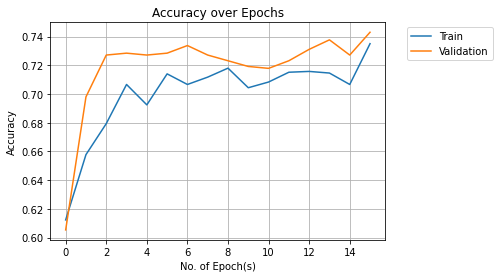

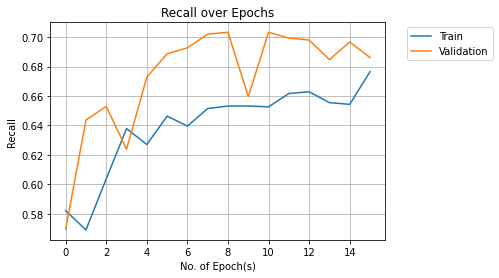

In [ ]:
from keras import models
from matplotlib import pyplot as plt

graph_path = resource_path + "graphs/"

def plot_cnn(metric:str):
  history = load_history()
  regex = re.compile(fr'{metric}.*$')
  metrics = list(filter(regex.search, history.keys()))
  training_metric, val_metric = metrics
  name, *_ = training_metric.split("_")
  fig, ax = plt.subplots()
  ax.plot(history[training_metric])
  ax.plot(history[val_metric])
  ax.set_title(f'{name.title()} over Epochs')
  ax.set_ylabel(name.title())
  ax.set_xlabel('No. of Epoch(s)')
  ax.grid()
  legend = ax.legend(['Train', 'Validation'], bbox_to_anchor=(1.05, 1))

  os.makedirs(graph_path, exist_ok=True)
  fig.savefig(graph_path + metric, bbox_extra_artists=[legend], bbox_inches='tight')

  plt.show()


plot_cnn("accuracy")
plot_cnn("recall")

In [ ]:
def predict(sentence: str):
  encoded_word = clean_up_user_input(sentence)
  encoded_word = np.array([encoded_word])

  output_encoder: LabelBinarizer = load_label_encoder()
  prediction = model.predict(encoded_word)
  print(prediction)
  prediction_binary = np.zeros_like(prediction)
  prediction_binary[:,prediction.argmax(1)] = 1
  ailment:str = output_encoder.inverse_transform(prediction)[0]
  return ailment.upper()

fast_text = load_fast_text()
# print((fast_text.wv.most_similar("headache", topn=30)))

# # Depression
# print(predict("I feel suicidal. Mental health kill hurt someone else medicine need help neuropath"))
# print(predict("I'm so sad, really feeling down, been gaining weight, no sleep"))
# print(predict("No sleep, feel lonely, really upset, feel nothing"))
# print(predict("Wow life sucks right now, super depressed, want to kill myself"))
# print(predict("I'm really depressed, suicidal, want to kill or hurt myself"))

# # Migraine
# print(predict("I have a headache. I feel senstivity to light. My head is hurting. It's twirling. I feel an aura."))
# print(predict("I am sensitive to light. I feel an aura around my body. Migraine"))
# print(predict("My head hurts a lot, there's an aura surrounding me."))
# print(predict("My head feels like its spinning, pain in head, pounding throbbing"))
# print(predict("My head hurts a lot, there's an aura surrounding me."))

# # Tetanus
# print(predict("I have a jaw ache. It's tetanus. My muscles are stiff"))
# print(predict("I feel really stiff and like I can't move"))
# print(predict("My jaw is really sore and aching, I think I have tetanus"))
# print(predict("My muscles are so stiff, I don't have a vaccine for tetanus"))
# print(predict("It's tetanus. My muscles are stiff. I have a jaw ache."))

y_true = ["DEPRESSION","DEPRESSION","DEPRESSION","DEPRESSION","DEPRESSION",
          "MIGRAINE","MIGRAINE","MIGRAINE","MIGRAINE","MIGRAINE","TETANUS",
          "TETANUS","TETANUS","TETANUS","TETANUS"]
y_pred = []
#Depression
y_pred.append(predict("I feel suicidal. Mental health kill hurt someone else medicine need help neuropath"))
y_pred.append(predict("I'm so sad, really feeling down, been gaining weight, no sleep"))
y_pred.append(predict("No sleep, feel lonely, really upset, feel nothing"))
y_pred.append(predict("Wow life sucks right now, super depressed, want to kill myself"))
y_pred.append(predict("I'm really depressed, suicidal, want to kill or hurt myself"))

#Migraine
y_pred.append(predict("I have a headache. I feel senstivity to light. My head is hurting. It's twirling. I feel an aura."))
y_pred.append(predict("I am sensitive to light. I feel an aura around my body. Migraine"))
y_pred.append(predict("My head hurts a lot, there's an aura surrounding me."))
y_pred.append(predict("My head feels like its spinning, pain in head, pounding throbbing"))
y_pred.append(predict("My head hurts a lot, there's an aura surrounding me."))

#Tetanus
y_pred.append(predict("I have a jaw ache. It's tetanus. My muscles are stiff"))
y_pred.append(predict("I feel really stiff and like I can't move, my jaw is still so stiff"))
y_pred.append(predict("My jaw is really sore and aching, I think I have tetanus"))
y_pred.append(predict("My muscles are so stiff, I don't have a vaccine for tetanus"))
y_pred.append(predict("It's tetanus. My muscles are stiff. I have a jaw ache."))

print(y_true)
print(y_pred)

[[0.51477665 0.34579363 0.2503132 ]]
[[0.31857902 0.18134275 0.6747222 ]]
[[0.5722483  0.25425205 0.4183073 ]]
[[0.42828417 0.28853124 0.14315209]]
[[0.6733362  0.07432127 0.4422106 ]]
[[0.09133777 0.791275   0.13885772]]
[[0.18479684 0.7402873  0.13228163]]
[[0.43753663 0.5148409  0.13957494]]
[[0.06364003 0.7783205  0.23995325]]
[[0.43753663 0.5148409  0.13957494]]
[[0.12347892 0.58870834 0.23314443]]
[[0.60301083 0.18112901 0.43150932]]
[[0.340238   0.52251107 0.13754797]]
[[0.14729148 0.68743485 0.1118291 ]]
[[0.10398403 0.65535146 0.19091561]]
['DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'TETANUS', 'TETANUS', 'TETANUS', 'TETANUS', 'TETANUS']
['DEPRESSION', 'TETANUS', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE']


['DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'TETANUS', 'TETANUS', 'TETANUS', 'TETANUS', 'TETANUS']
['DEPRESSION', 'TETANUS', 'DEPRESSION', 'DEPRESSION', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE', 'DEPRESSION', 'MIGRAINE', 'MIGRAINE', 'MIGRAINE']
[[4 0 1]
 [0 5 0]
 [1 4 0]]


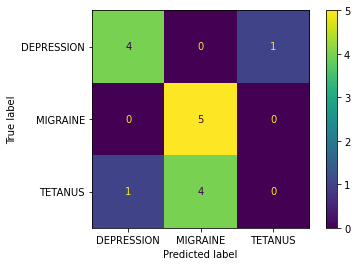

In [ ]:
from sklearn import metrics


display_labels=["DEPRESSION","MIGRAINE","TETANUS"]
cm = metrics.confusion_matrix(y_true,y_pred,labels=["DEPRESSION","MIGRAINE","TETANUS"])

print(y_true)
print(y_pred)

print(cm)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.savefig(graph_path + "confusion_matrix")